In [1]:
from src import data_loader
import yaml

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
config = yaml.safe_load(open("config/config.yaml"))

In [3]:
# Load dataset
df = config["data"]["raw_path"]

df = data_loader.load_data(df)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


The dataset is PCA Treated

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11665 entries, 0 to 11664
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11665 non-null  int64  
 1   V1      11665 non-null  float64
 2   V2      11665 non-null  float64
 3   V3      11665 non-null  float64
 4   V4      11665 non-null  float64
 5   V5      11665 non-null  float64
 6   V6      11665 non-null  float64
 7   V7      11665 non-null  float64
 8   V8      11665 non-null  float64
 9   V9      11665 non-null  float64
 10  V10     11665 non-null  float64
 11  V11     11665 non-null  float64
 12  V12     11664 non-null  float64
 13  V13     11664 non-null  float64
 14  V14     11664 non-null  float64
 15  V15     11664 non-null  float64
 16  V16     11664 non-null  float64
 17  V17     11664 non-null  float64
 18  V18     11664 non-null  float64
 19  V19     11664 non-null  float64
 20  V20     11664 non-null  float64
 21  V21     11664 non-null  float64
 22

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [6]:
pd.unique(df["Class"])

array([ 0.,  1., nan])

In [46]:
df.duplicated().sum()

44

In [7]:
# Remove nan Values
df = data_loader.clean_data(df,"Class")
pd.unique(df["Class"])

array([0., 1.])

In [8]:
df.shape

(11664, 31)

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,...,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000
mean,7700.038923,-0.219749,0.275054,0.898063,0.281090,-0.078968,0.140066,-0.111568,-0.051870,0.893578,...,-0.061180,-0.155205,-0.034310,0.017421,0.101538,0.070630,0.007481,0.000804,62.795132,0.004201
std,5964.152936,1.561107,1.305821,1.272534,1.468011,1.184380,1.305527,1.129291,1.237045,1.182180,...,0.902556,0.624275,0.508488,0.592137,0.429725,0.560307,0.406841,0.262342,179.816783,0.064681
min,0.000000,-27.670569,-34.607649,-21.405836,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.555808,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,2463.000000,-0.987263,-0.256929,0.416376,-0.615559,-0.680729,-0.622467,-0.583650,-0.186433,0.181498,...,-0.268948,-0.545531,-0.172765,-0.332771,-0.146729,-0.346888,-0.080638,-0.015513,5.000000,0.000000
50%,6308.000000,-0.347859,0.263103,0.950089,0.215481,-0.179583,-0.147979,-0.088459,0.011706,0.880714,...,-0.130094,-0.129191,-0.044523,0.073145,0.139638,0.009023,-0.003818,0.015397,15.950000,0.000000
75%,11896.500000,1.159313,0.888821,1.616290,1.153440,0.348249,0.509058,0.439539,0.267141,1.570372,...,0.023295,0.235448,0.076761,0.402522,0.374859,0.417677,0.108443,0.073961,50.000000,0.000000
max,19915.000000,1.960497,9.067613,4.101716,11.927512,34.099309,21.393069,34.303177,5.499963,10.392889,...,22.599543,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [10]:
df.shape

(11664, 31)

[]

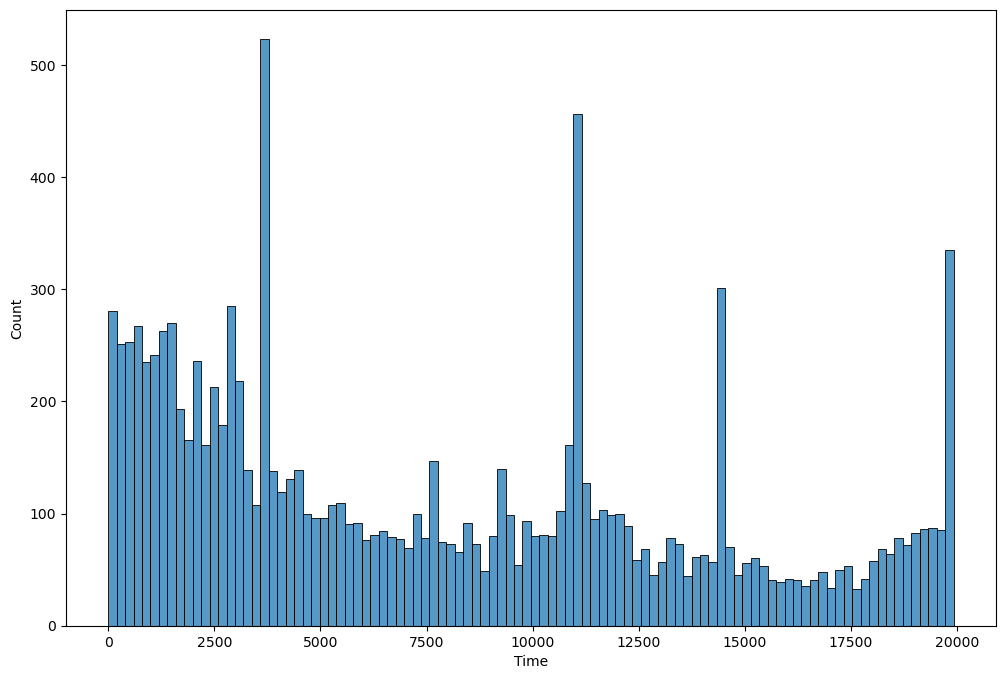

In [28]:
# Distribution: Time of day during transactions
plt.figure(figsize=(12,8))
sns.histplot(df["Time"], bins=100)
plt.plot()

[]

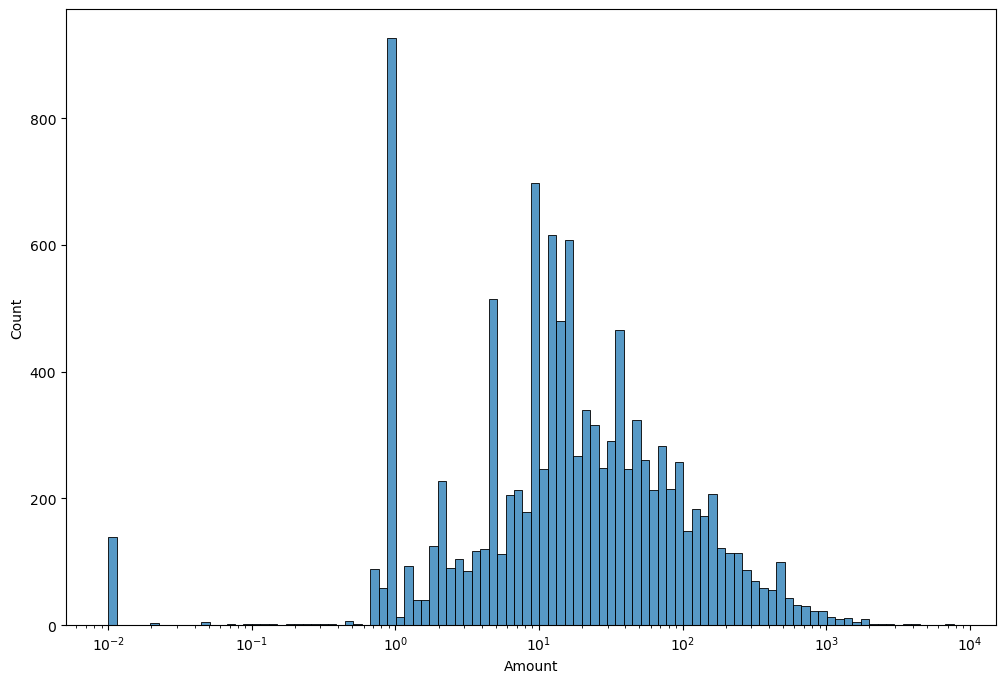

In [30]:
# Distribution: Amount transferred
plt.figure(figsize=(12,8))
sns.histplot(df["Amount"], bins=100, log_scale=True)
plt.plot()

In [44]:
df[["Amount", "Time"]].describe()


,Amount,Time
count,11664.000000,11664.000000
mean,62.795132,7700.038923
std,179.816783,5964.152936
min,0.000000,0.000000
25%,5.000000,2463.000000
50%,15.950000,6308.000000
75%,50.000000,11896.500000
max,7712.430000,19915.000000


# Target Variable: Class

df[Class][0]: Genuine transaction

df[Class][1]: Fraud transaction

In [19]:
df["Class"].value_counts()

Class
0.0    11615
1.0       49
Name: count, dtype: int64

In [20]:
df["Class"].value_counts(normalize=True)

Class
0.0    0.995799
1.0    0.004201
Name: proportion, dtype: float64

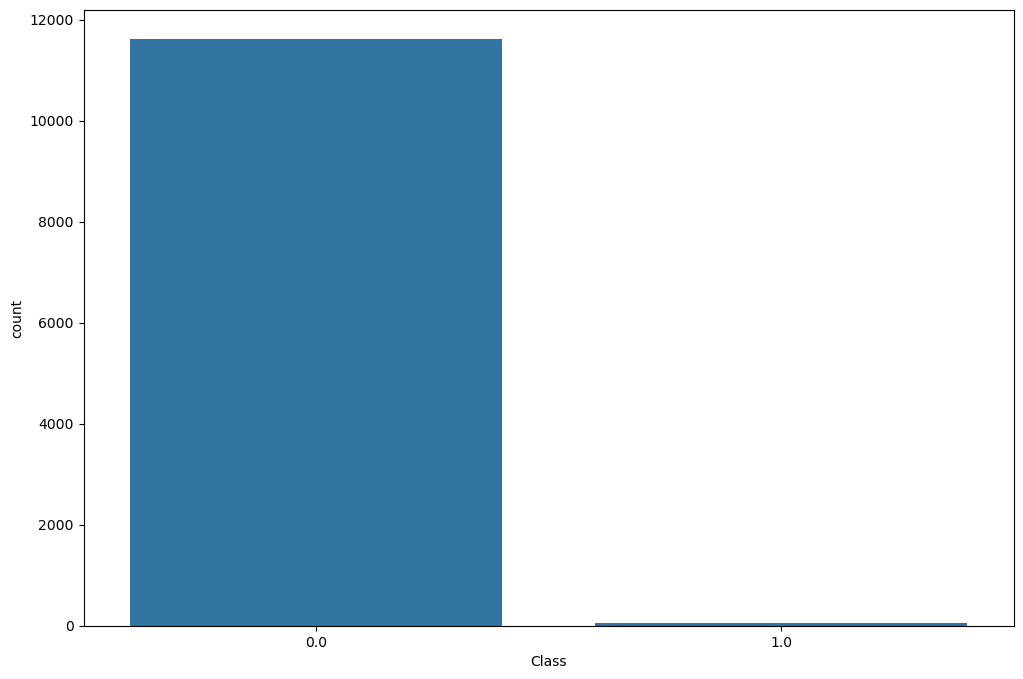

In [23]:
# Plot: Genuine vs fraud
plt.figure(figsize=(12,8))
sns.countplot(x="Class", data=df)
plt.show()

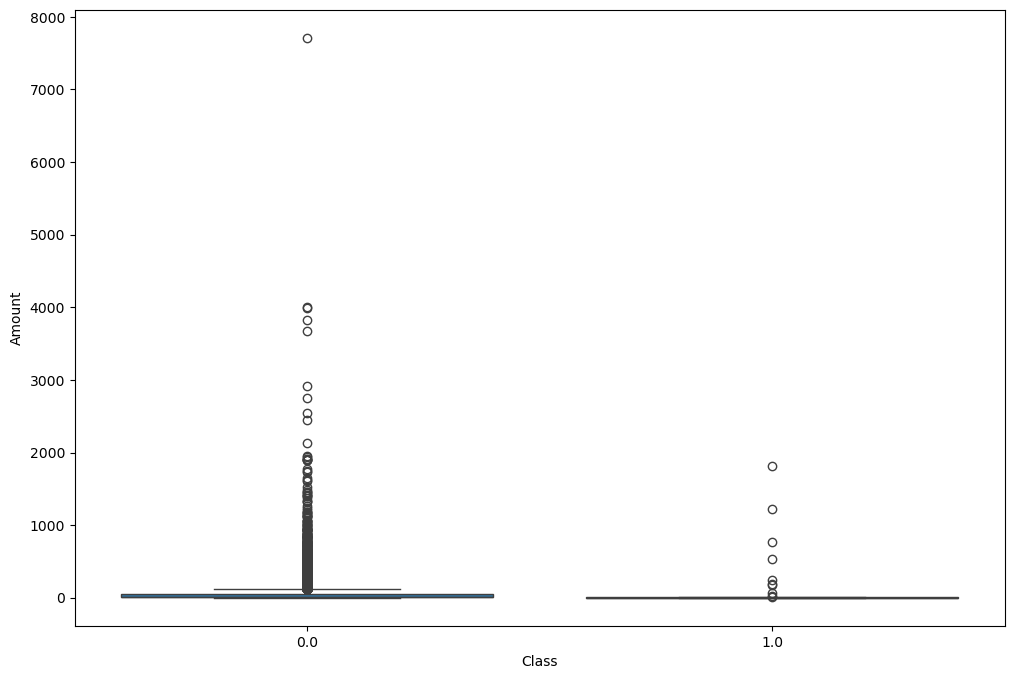

In [32]:
# Amount scale of gunuine vs fraud
plt.figure(figsize=(12,8))
sns.boxplot(x="Class", y="Amount", data=df)
plt.show()

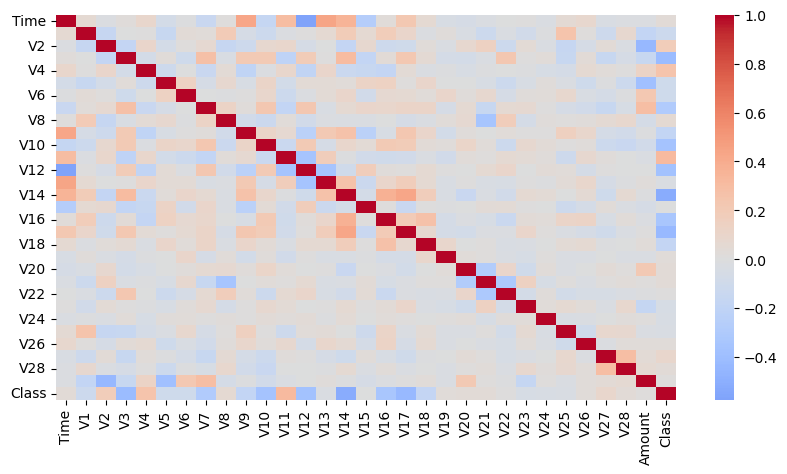

In [48]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=False, center=0, cmap='coolwarm')
plt.show()

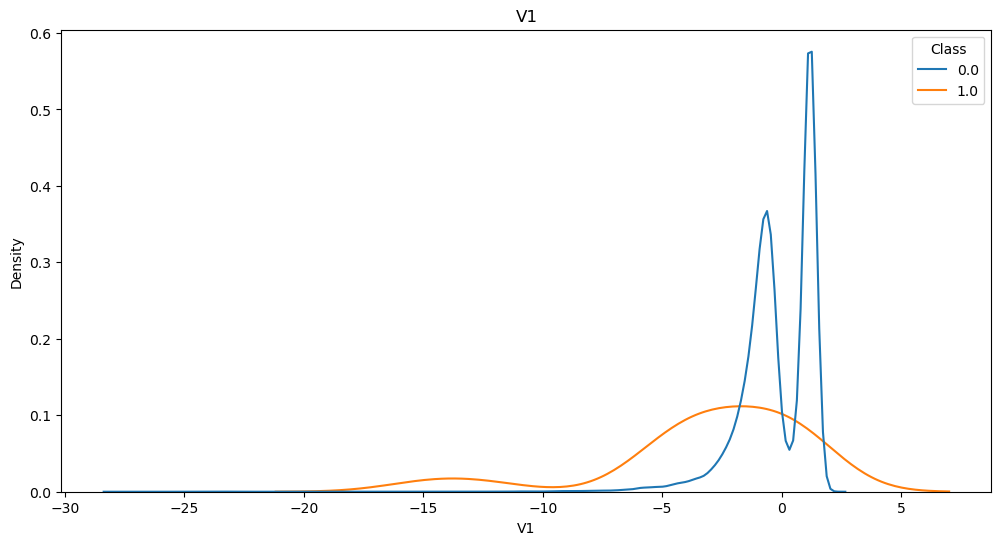

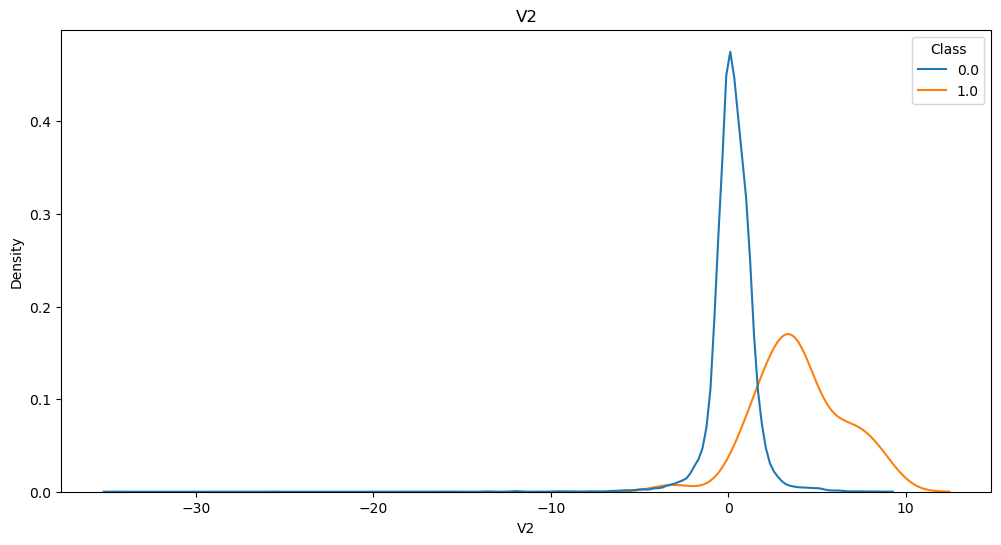

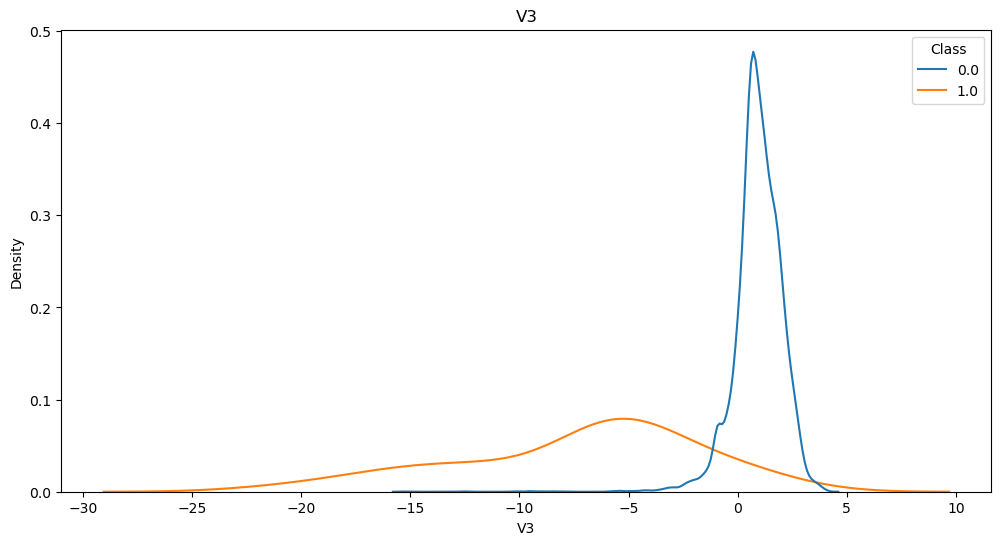

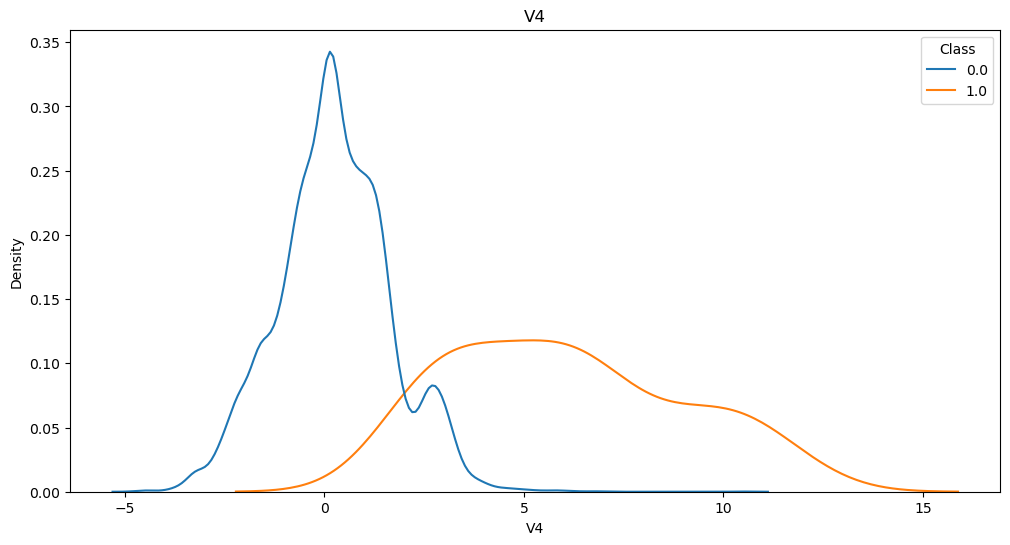

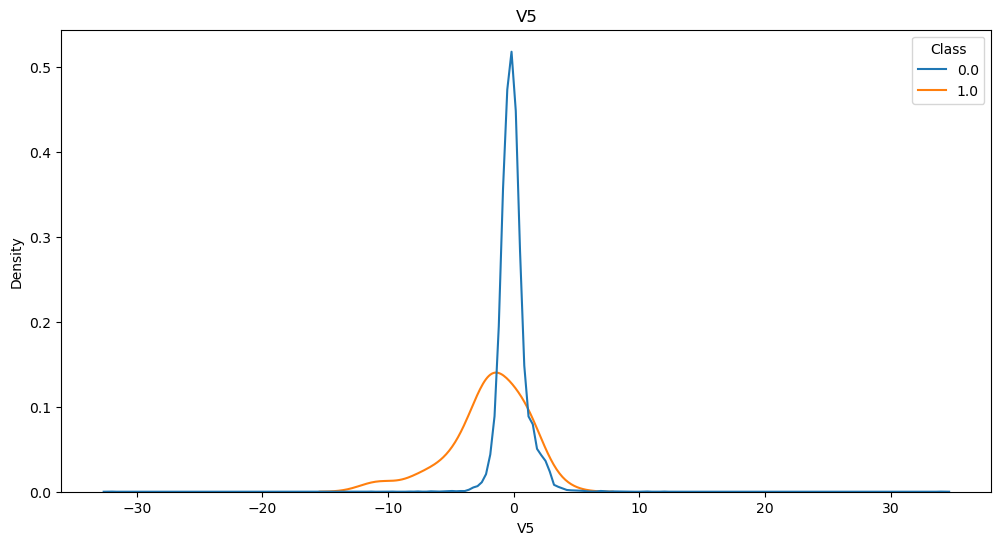

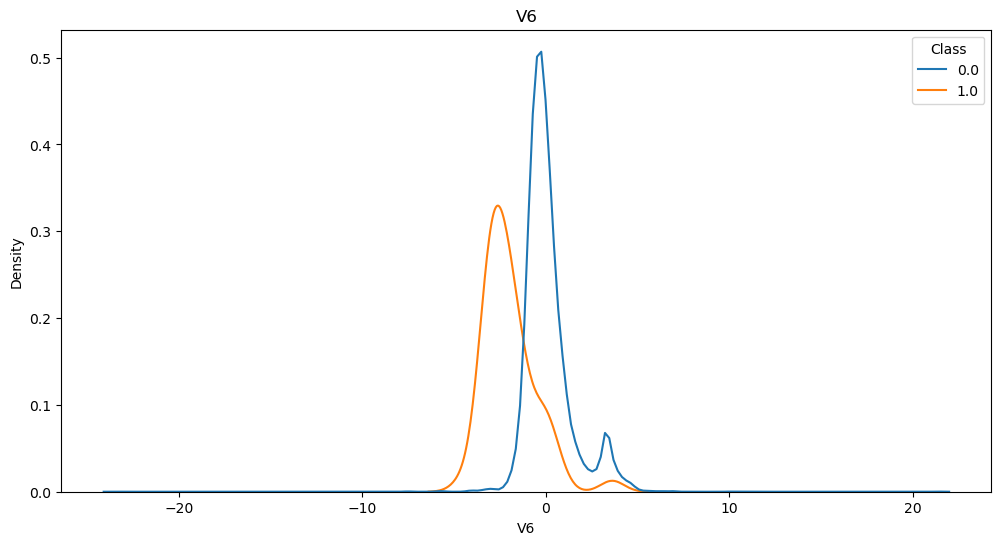

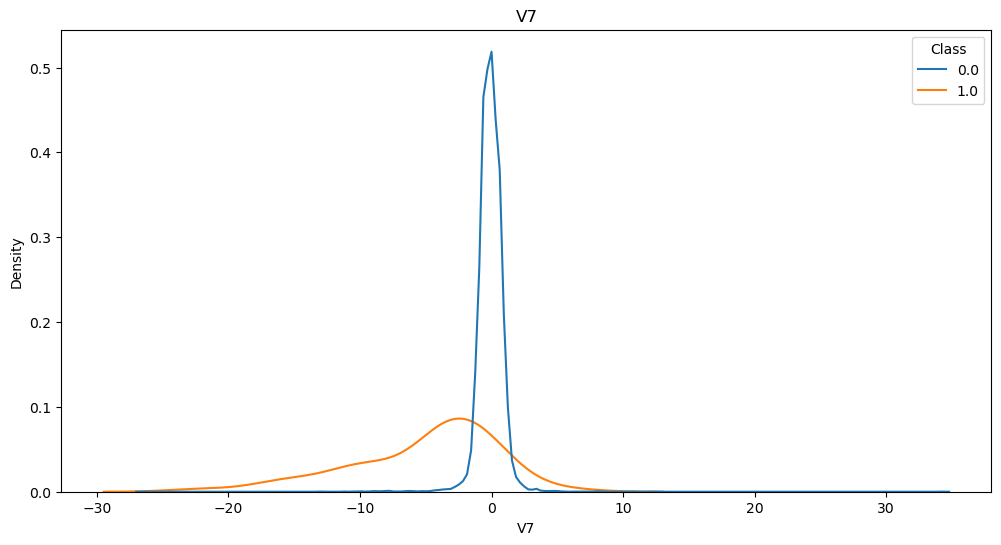

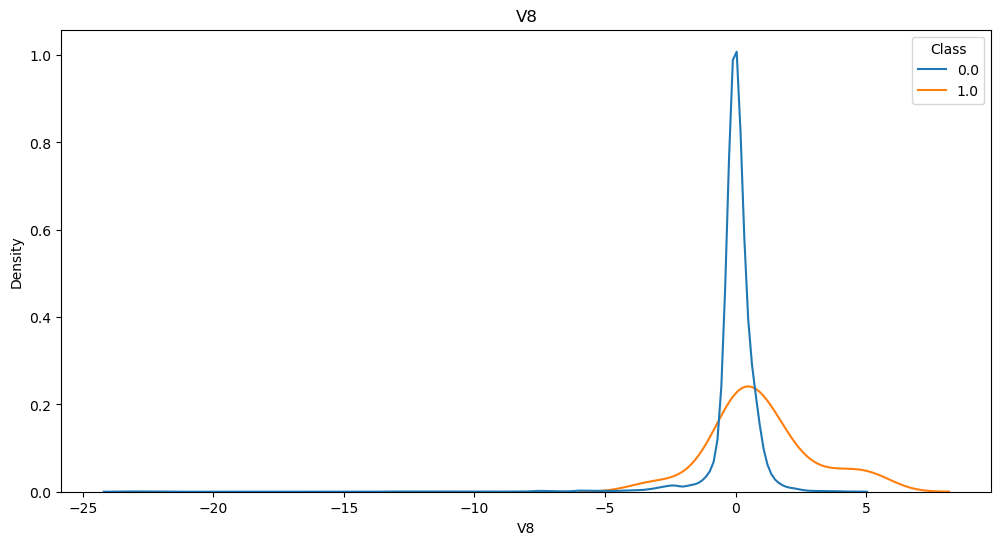

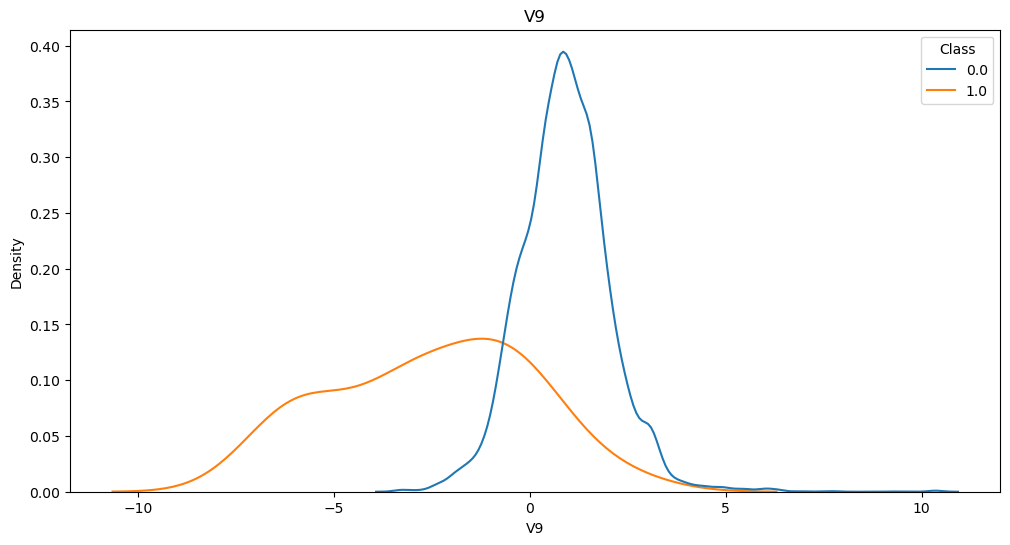

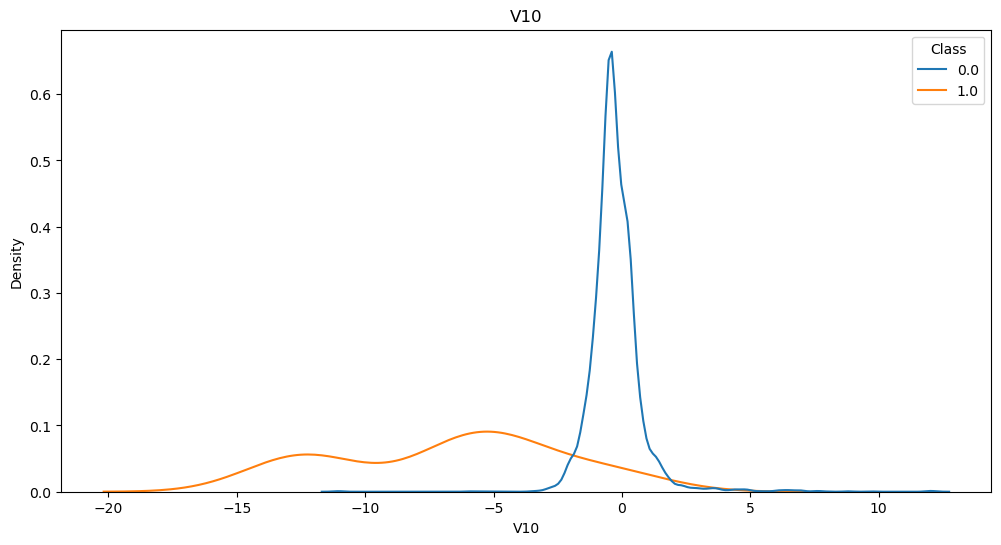

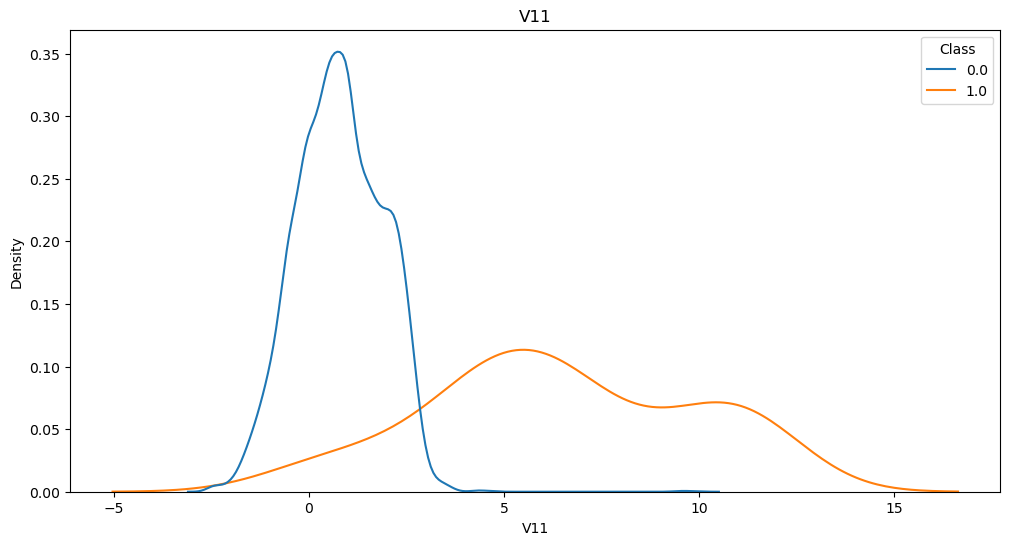

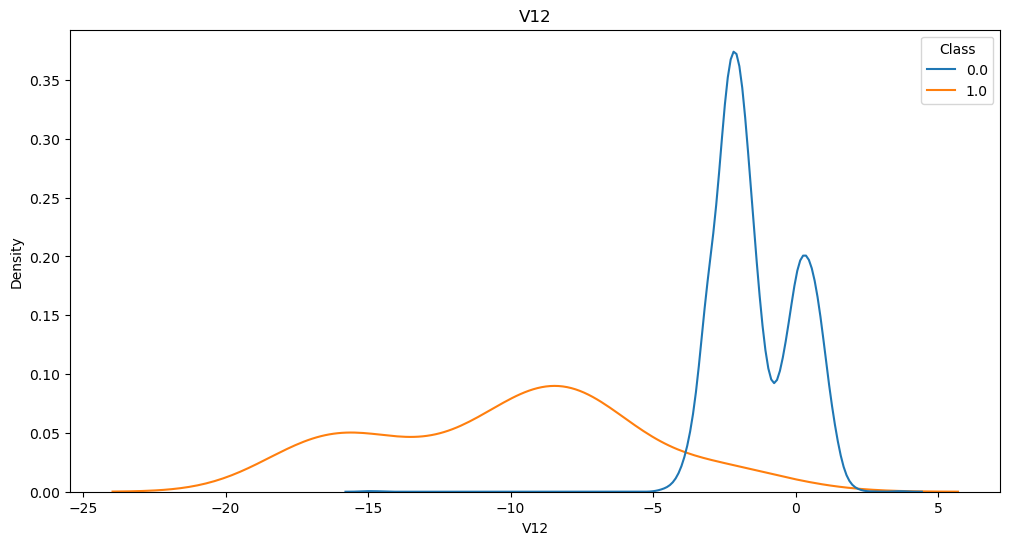

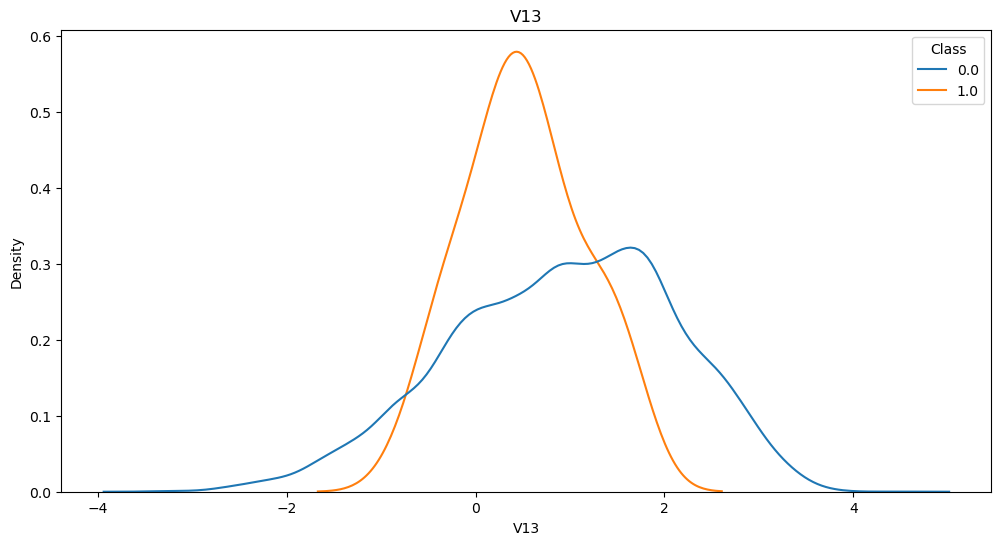

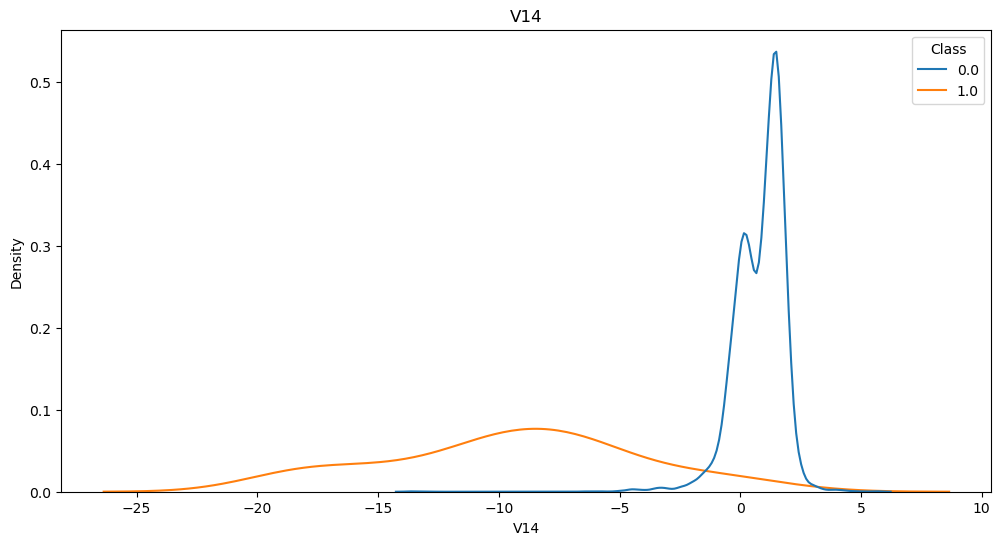

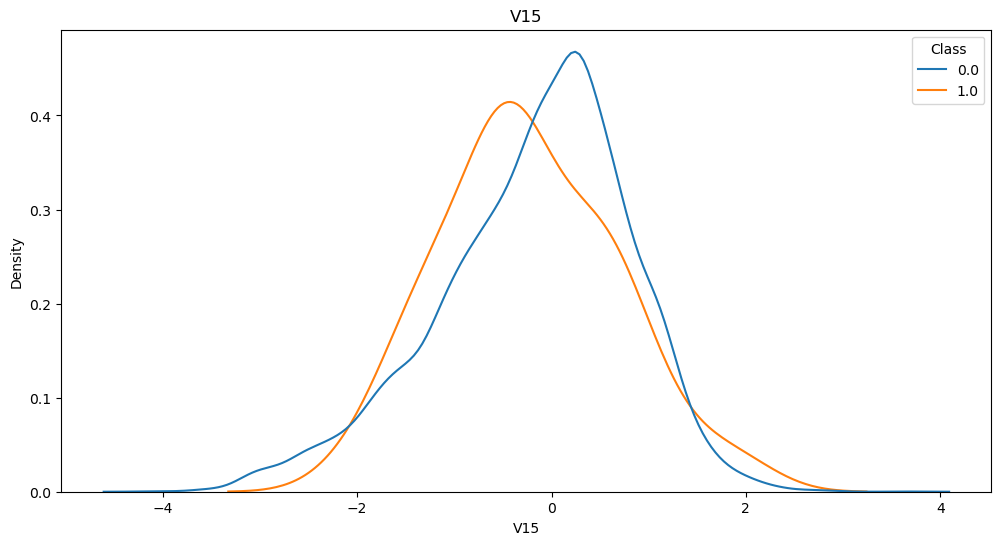

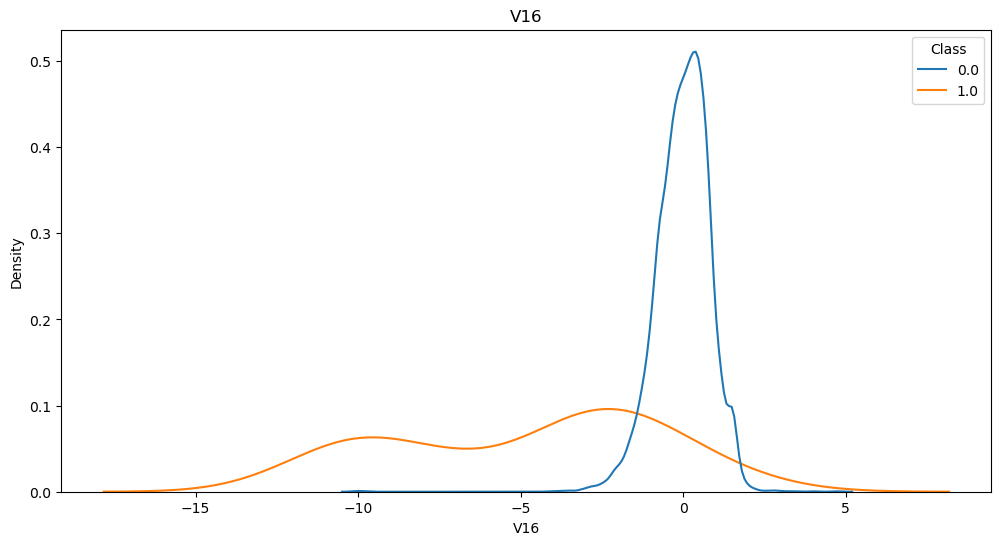

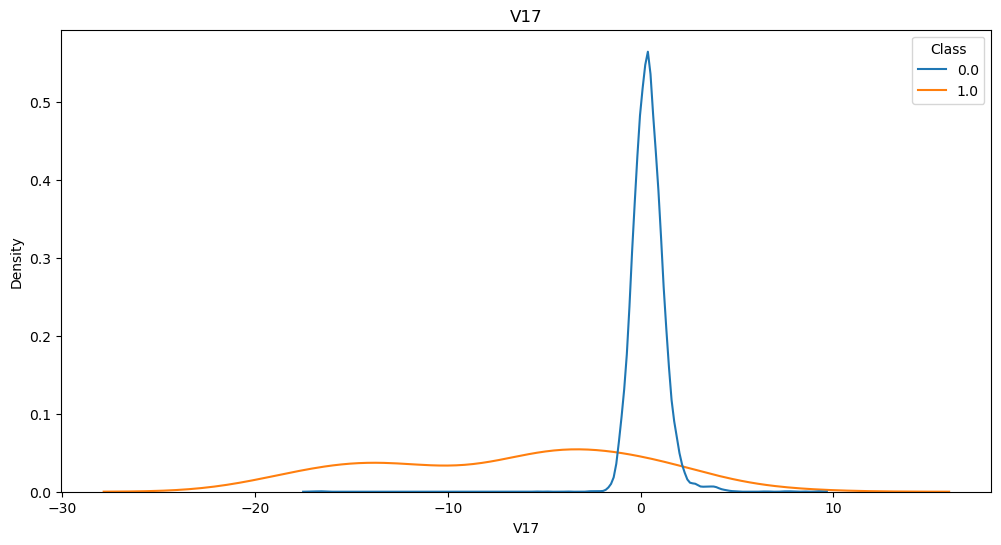

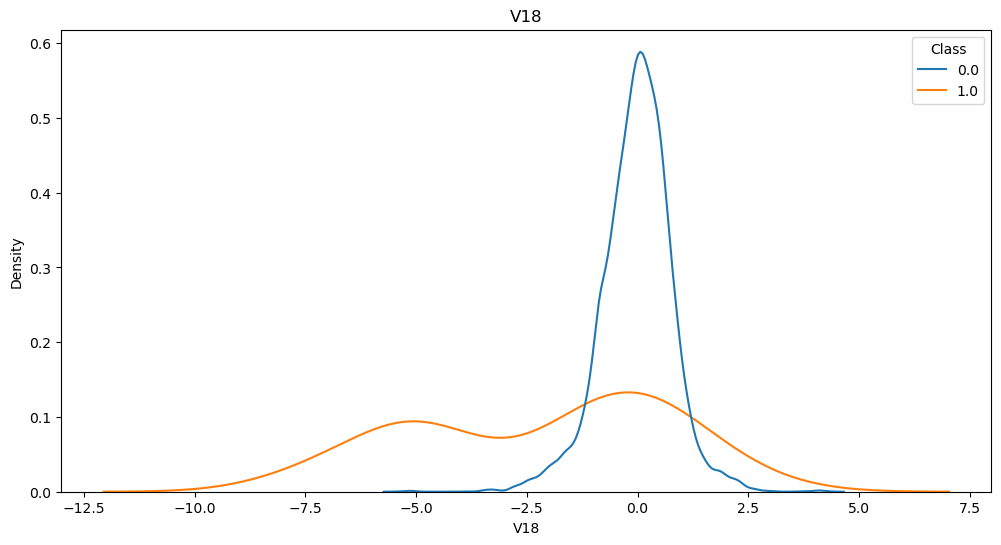

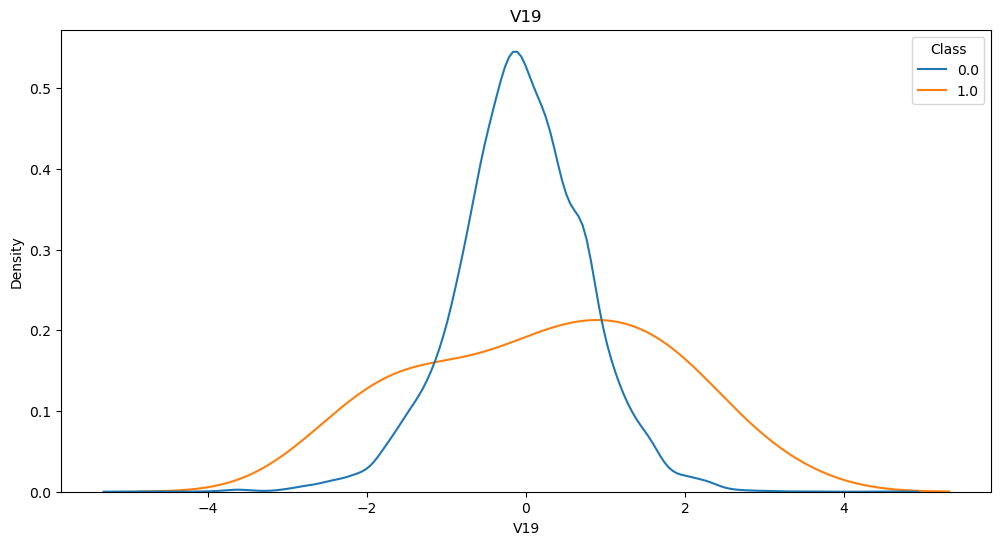

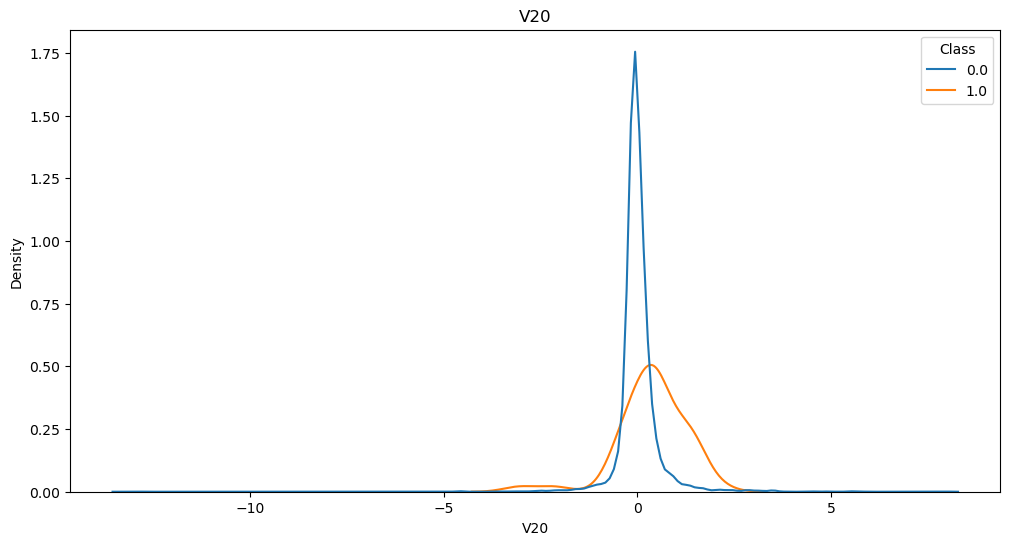

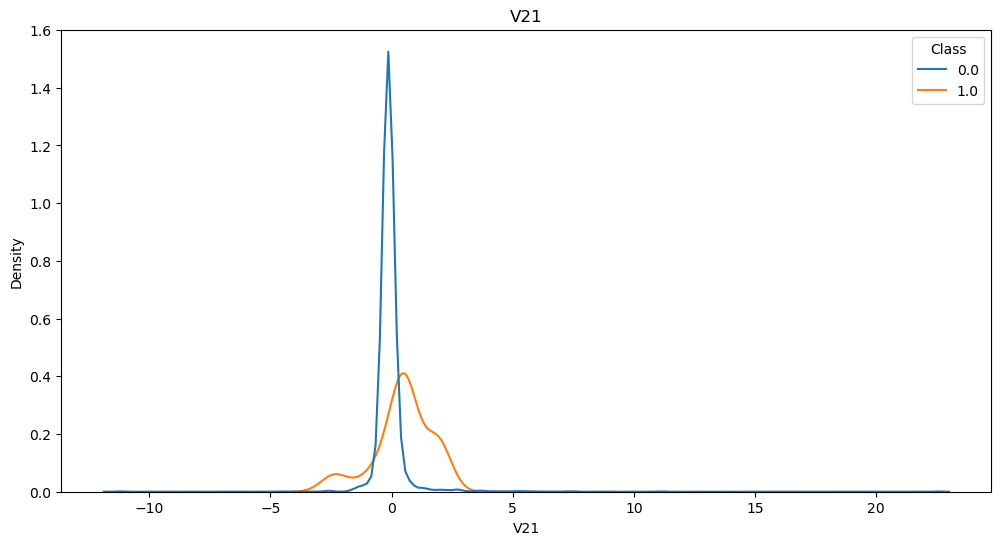

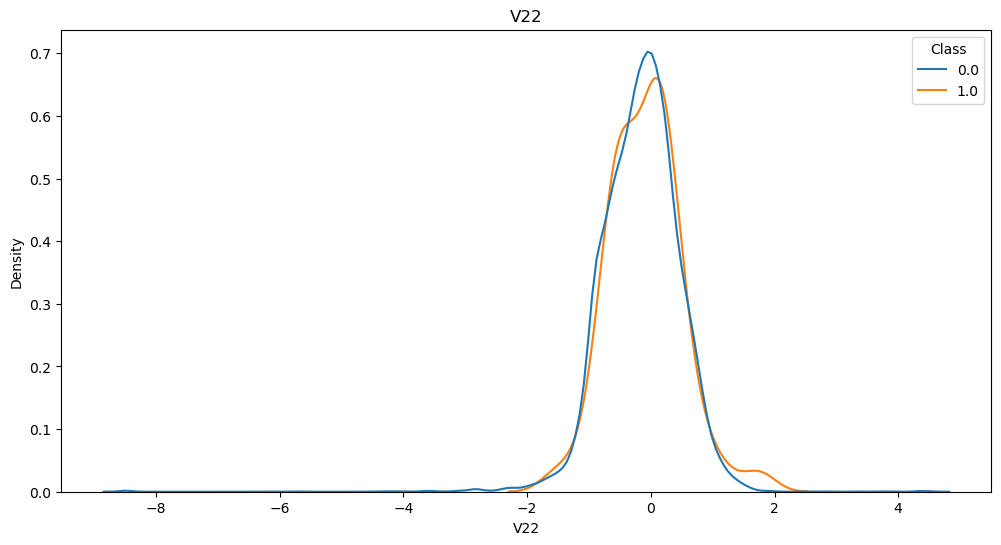

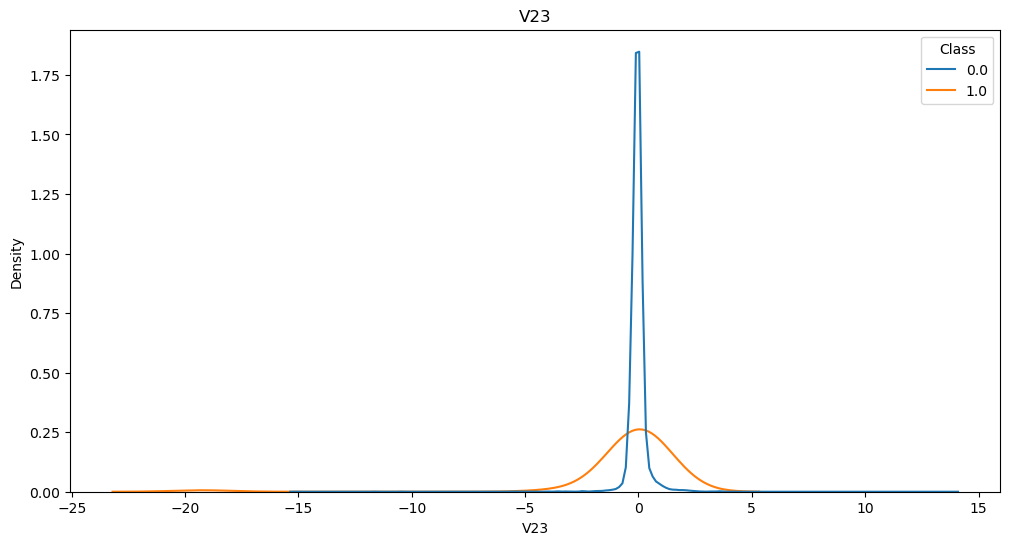

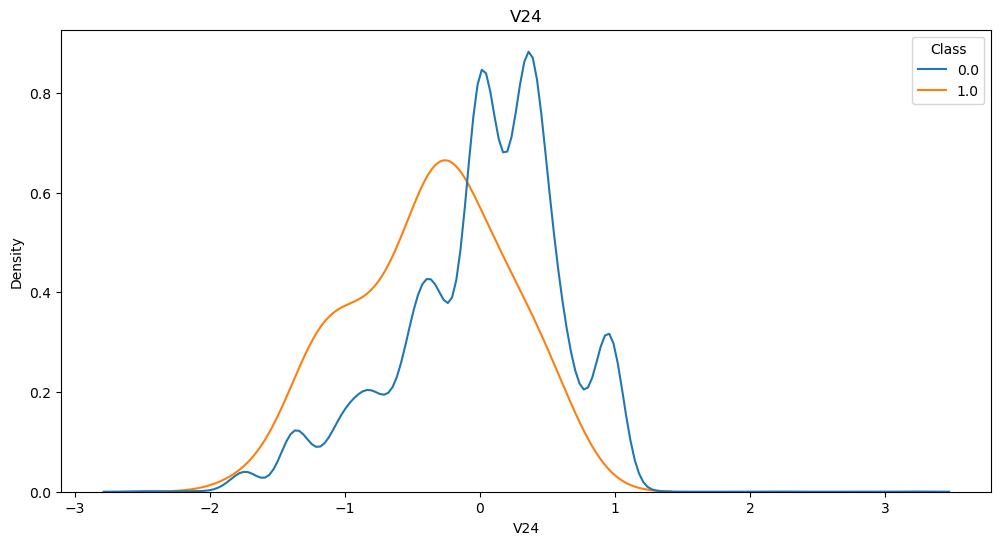

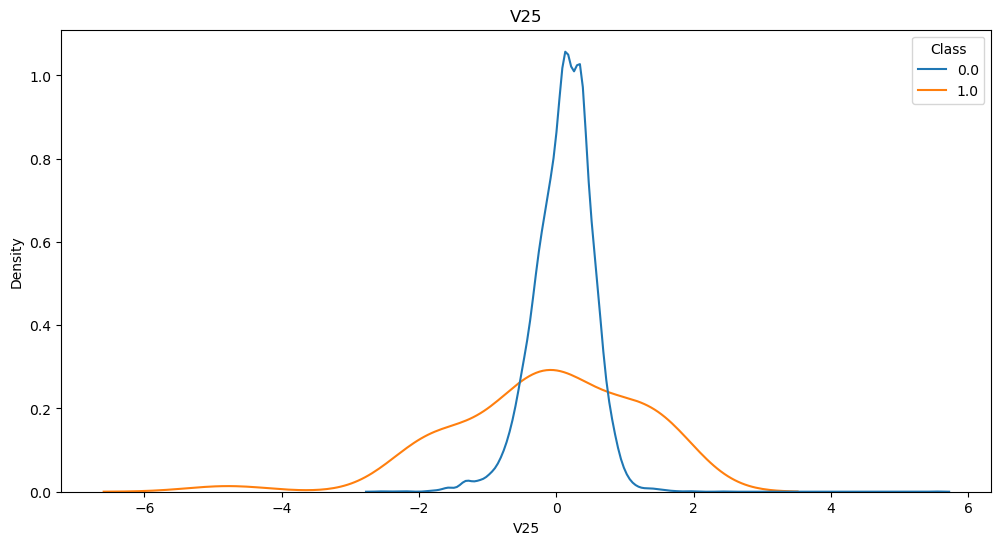

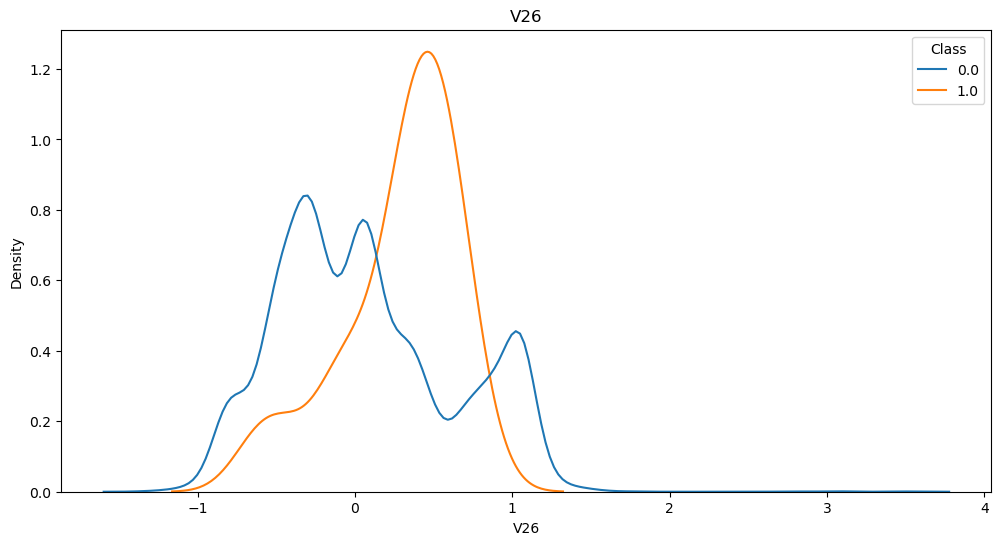

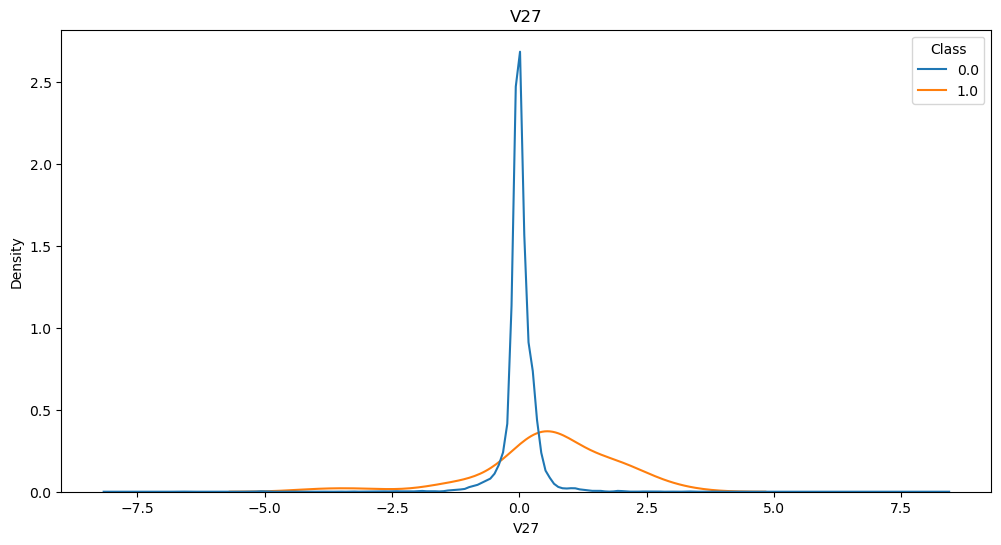

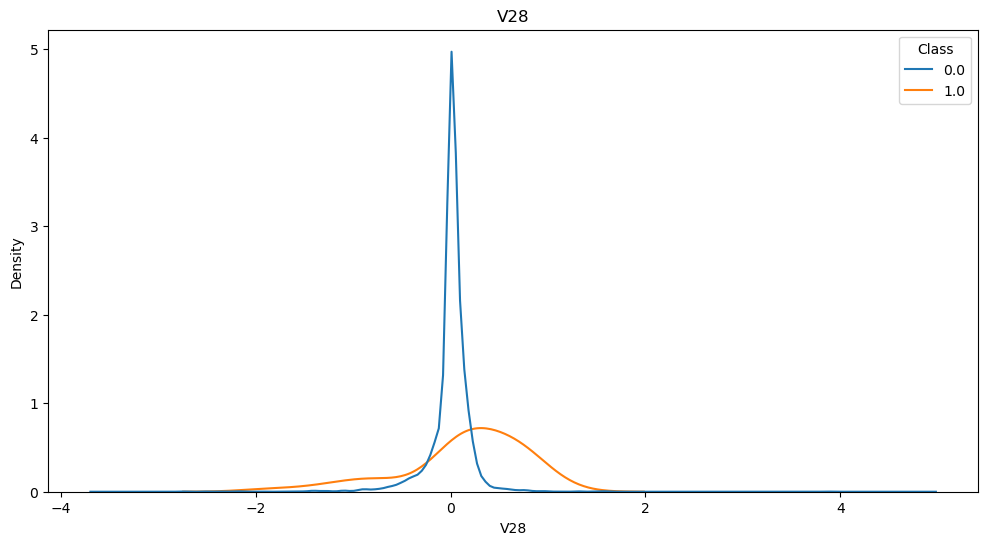

In [35]:
# Distribution of PCA components by Class
for col in df.columns[1:29]:  # V1-V28
    plt.figure(figsize=(12,6))
    sns.kdeplot(data=df, x=col, hue="Class", common_norm=False)
    plt.title(col)
    plt.show()


[]

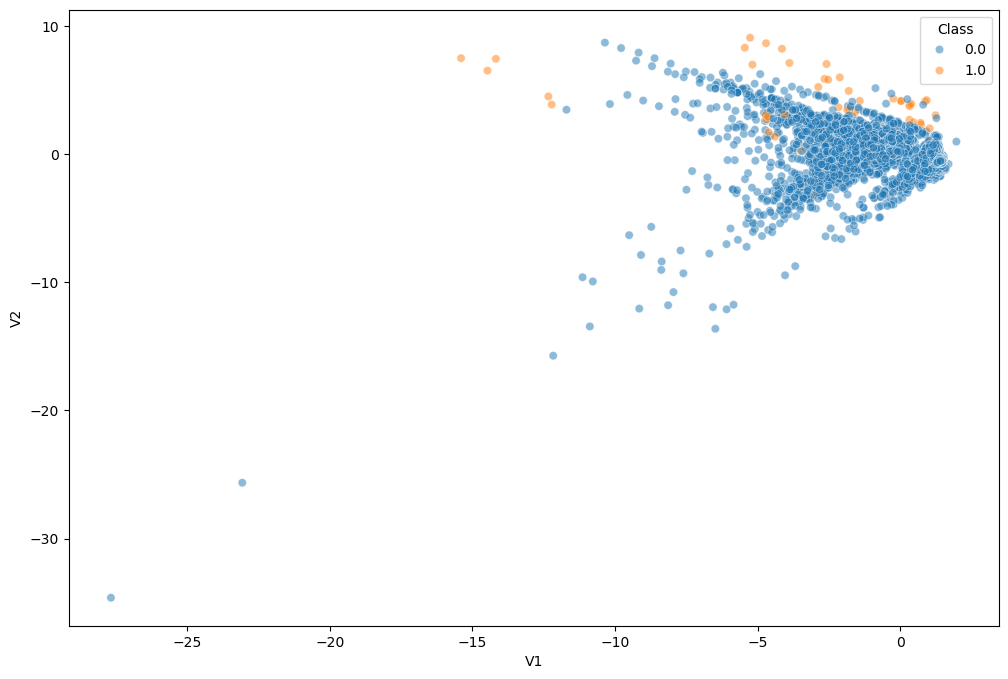

In [43]:
# Scatter plot - Outliers
    # V1, V2
plt.figure(figsize=(12,8))
sns.scatterplot(x="V1", y="V2", hue="Class", data=df, alpha=0.5)
plt.plot()